<a href="https://colab.research.google.com/github/Patchaa119/BSC_DPDM2025/blob/main/CH3_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
flood = pd.read_csv('/content/drive/My Drive/BSC - Bambi/data/flooding database.csv')
flood.head()

,system:index,index,threshold_type,glide_index,dfo_country,dfo_other_country,dfo_centroid_x,dfo_centroid_y,dfo_began,dfo_ended,...,dfo_cause,dfo_severity,gfd_area,gfd_exp_ghsl_ts,gfd_exp_ghsl_2000,gfd_exp_ghsl_2015,Errors,dif 2000,dif 2015,error 2000
0,DFO_1586_From_20000218_to_20000301,1586,otsu,0,Australia,0,143.697800,-31.268059,2/18/00,3/1/00,...,Heavy rain,2.0,316.73,38.0,38.0,43,1,0,-5,NaN
1,DFO_1587_From_20000217_to_20000311,1587,otsu,0,Madagascar,0,47.295670,-15.782624,2/17/00,3/11/00,...,"Tropical Storm, Surge",1.0,228.50,4594.0,4594.0,6855,1,0,-2261,NaN
2,DFO_1595_From_20000405_to_20000425,1595,otsu,0,Romania,Hungary,22.415404,46.763746,4/5/00,4/25/00,...,"Snowmelt, Ice, Rain",2.0,89.10,3093.0,3093.0,4618,1,0,-1525,NaN
3,DFO_1614_From_20000711_to_20000810,1614,otsu,0,Thailand,Vietnam,105.063841,11.242567,7/11/00,8/10/00,...,Heavy rain,1.0,4322.47,544758.0,544758.0,658643,1,0,-113885,NaN
4,DFO_1627_From_20000830_to_20000910,1627,otsu,0,China,Russia,132.057679,43.773883,8/30/00,9/10/00,...,"Tropical Storm, Surge",1.0,740.33,785363.0,785363.0,766309,1,0,19054,1.0


# Data Cleaning

## Missing Data

### Check Missing Data

In [4]:
flood.isnull().any()

,0
system:index,False
index,False
threshold_type,False
glide_index,True
dfo_country,False
dfo_other_country,True
dfo_centroid_x,False
dfo_centroid_y,False
dfo_began,False
dfo_ended,True


In [5]:
flood.isnull().sum()

,0
system:index,0
index,0
threshold_type,0
glide_index,232
dfo_country,0
dfo_other_country,275
dfo_centroid_x,0
dfo_centroid_y,0
dfo_began,0
dfo_ended,1


### Drop Record ที่มี missing ออก

drop ถ้ามี missing

In [ ]:
flood.shape

(913, 23)

In [ ]:
flood_drop1 = flood.dropna()
flood_drop1.shape

(13, 23)

drop เฉพาะเกิด missing ในตัวแปลที่เราจะใช้เท่านั้น

- dfo_country

- dfo_other_country

- dfo_began

- dfo_ended

- dfo_dead

- dfo_cause

- dfo_severity

In [ ]:
flood_drop2 = flood.dropna(subset=['dfo_country', 'dfo_other_country', 'dfo_began', 'dfo_ended', 'dfo_dead', 'dfo_cause', 'dfo_severity'])
flood_drop2.shape

(637, 23)

ที่ dfo_other_country มี missing เยอะ อาจจะแปลว่าจริงๆ แล้ว น้ำไม่ได้ไปท่วมประเทศอื่น

In [ ]:
flood_drop2.head()

,system:index,index,threshold_type,glide_index,dfo_country,dfo_other_country,dfo_centroid_x,dfo_centroid_y,dfo_began,dfo_ended,...,dfo_cause,dfo_severity,gfd_area,gfd_exp_ghsl_ts,gfd_exp_ghsl_2000,gfd_exp_ghsl_2015,Errors,dif 2000,dif 2015,error 2000
0,DFO_1586_From_20000218_to_20000301,1586,otsu,0,Australia,0,143.697800,-31.268059,2/18/00,3/1/00,...,Heavy rain,2.0,316.73,38.0,38.0,43,1,0,-5,NaN
1,DFO_1587_From_20000217_to_20000311,1587,otsu,0,Madagascar,0,47.295670,-15.782624,2/17/00,3/11/00,...,"Tropical Storm, Surge",1.0,228.50,4594.0,4594.0,6855,1,0,-2261,NaN
2,DFO_1595_From_20000405_to_20000425,1595,otsu,0,Romania,Hungary,22.415404,46.763746,4/5/00,4/25/00,...,"Snowmelt, Ice, Rain",2.0,89.10,3093.0,3093.0,4618,1,0,-1525,NaN
3,DFO_1614_From_20000711_to_20000810,1614,otsu,0,Thailand,Vietnam,105.063841,11.242567,7/11/00,8/10/00,...,Heavy rain,1.0,4322.47,544758.0,544758.0,658643,1,0,-113885,NaN
4,DFO_1627_From_20000830_to_20000910,1627,otsu,0,China,Russia,132.057679,43.773883,8/30/00,9/10/00,...,"Tropical Storm, Surge",1.0,740.33,785363.0,785363.0,766309,1,0,19054,1.0


### เติม Dummy

In [ ]:
flood[flood.isnull()['dfo_other_country']]

,system:index,index,threshold_type,glide_index,dfo_country,dfo_other_country,dfo_centroid_x,dfo_centroid_y,dfo_began,dfo_ended,...,dfo_cause,dfo_severity,gfd_area,gfd_exp_ghsl_ts,gfd_exp_ghsl_2000,gfd_exp_ghsl_2015,Errors,dif 2000,dif 2015,error 2000
172,DFO_2415_From_20040110_to_20040119,2415,std,0,Iran,NaN,51.439491,29.466641,1/10/04,1/19/04,...,Heavy rain,1.0,7017.61,23986.0,23986.0,116060,1,0,-92074,NaN
383,DFO_3089_From_20070530_to_20070603,3089,std,0,Dominican Republic,NaN,-71.053795,19.547861,5/30/07,6/3/07,...,Heavy rain,1.0,100.92,13819.0,13819.0,11672,1,0,2147,NaN
387,DFO_3097_From_20070611_to_20070624,3097,std,LS-2007-000080-BGD,Bangladesh,NaN,91.953546,22.397464,6/11/07,6/24/07,...,Heavy rain,1.0,20493.38,4536692.0,4536692.0,8995159,1,0,-4458467,NaN
412,DFO_3136_From_20070721_to_20071015,3136,std,0,Bangladesh,NaN,91.233643,23.916419,7/21/07,10/15/07,...,Heavy rain,1.0,78785.53,27712991.0,27712998.0,55288622,0,-7,-27575631,NaN
428,DFO_3166_From_20070726_to_20071010,3166,std,FL-2007-000132-BFA,Ghana,NaN,0.612005,13.037658,7/26/07,10/10/07,...,Heavy rain,1.5,7621.96,325408.0,325408.0,624312,1,0,-298904,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,DFO_4683_From_20180901_to_20181002,4683,std,NaN,Ghana,NaN,-1.066060,9.537550,9/1/18,10/2/18,...,Dam,1.5,1866.91,79032.0,38895.0,79032,1,40137,0,NaN
909,DFO_4695_From_20181023_to_20181027,4695,std,NaN,Mexico,NaN,-105.236000,23.721800,10/23/18,10/27/18,...,"Tropical Storm, Surge",1.5,2720.37,23128.0,15725.0,23128,1,7403,0,NaN
910,DFO_4703_From_20181029_to_20181107,4703,otsu,NaN,Paraguay,NaN,-57.085300,-25.342700,10/29/18,11/7/18,...,Heavy rain,1.0,10019.87,29435.0,25393.0,29435,1,4042,0,NaN
911,DFO_4704_From_20181124_to_20181129,4704,std,NaN,Vietnam,NaN,107.137000,11.491000,11/24/18,11/29/18,...,"Tropical Storm, Surge",1.0,6467.41,218916.0,173753.0,218915,0,45163,1,NaN


In [ ]:
flood_filldummy = flood.fillna({'dfo_other_country':'Unknown'})
flood_filldummy

,system:index,index,threshold_type,glide_index,dfo_country,dfo_other_country,dfo_centroid_x,dfo_centroid_y,dfo_began,dfo_ended,...,dfo_cause,dfo_severity,gfd_area,gfd_exp_ghsl_ts,gfd_exp_ghsl_2000,gfd_exp_ghsl_2015,Errors,dif 2000,dif 2015,error 2000
0,DFO_1586_From_20000218_to_20000301,1586,otsu,0,Australia,0,143.697800,-31.268059,2/18/00,3/1/00,...,Heavy rain,2.0,316.73,38.0,38.0,43,1,0,-5,NaN
1,DFO_1587_From_20000217_to_20000311,1587,otsu,0,Madagascar,0,47.295670,-15.782624,2/17/00,3/11/00,...,"Tropical Storm, Surge",1.0,228.50,4594.0,4594.0,6855,1,0,-2261,NaN
2,DFO_1595_From_20000405_to_20000425,1595,otsu,0,Romania,Hungary,22.415404,46.763746,4/5/00,4/25/00,...,"Snowmelt, Ice, Rain",2.0,89.10,3093.0,3093.0,4618,1,0,-1525,NaN
3,DFO_1614_From_20000711_to_20000810,1614,otsu,0,Thailand,Vietnam,105.063841,11.242567,7/11/00,8/10/00,...,Heavy rain,1.0,4322.47,544758.0,544758.0,658643,1,0,-113885,NaN
4,DFO_1627_From_20000830_to_20000910,1627,otsu,0,China,Russia,132.057679,43.773883,8/30/00,9/10/00,...,"Tropical Storm, Surge",1.0,740.33,785363.0,785363.0,766309,1,0,19054,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,DFO_4683_From_20180901_to_20181002,4683,std,NaN,Ghana,Unknown,-1.066060,9.537550,9/1/18,10/2/18,...,Dam,1.5,1866.91,79032.0,38895.0,79032,1,40137,0,NaN
909,DFO_4695_From_20181023_to_20181027,4695,std,NaN,Mexico,Unknown,-105.236000,23.721800,10/23/18,10/27/18,...,"Tropical Storm, Surge",1.5,2720.37,23128.0,15725.0,23128,1,7403,0,NaN
910,DFO_4703_From_20181029_to_20181107,4703,otsu,NaN,Paraguay,Unknown,-57.085300,-25.342700,10/29/18,11/7/18,...,Heavy rain,1.0,10019.87,29435.0,25393.0,29435,1,4042,0,NaN
911,DFO_4704_From_20181124_to_20181129,4704,std,NaN,Vietnam,Unknown,107.137000,11.491000,11/24/18,11/29/18,...,"Tropical Storm, Surge",1.0,6467.41,218916.0,173753.0,218915,0,45163,1,NaN


In [ ]:
flood_filldummy.isnull().sum()

,0
system:index,0
index,0
threshold_type,0
glide_index,232
dfo_country,0
dfo_other_country,0
dfo_centroid_x,0
dfo_centroid_y,0
dfo_began,0
dfo_ended,1


### เติม missing ด้วยค่ากลาง

In [ ]:
flood.groupby('dfo_cause').count()

,system:index,index,threshold_type,glide_index,dfo_country,dfo_other_country,dfo_centroid_x,dfo_centroid_y,dfo_began,dfo_ended,...,dfo_displaced,dfo_severity,gfd_area,gfd_exp_ghsl_ts,gfd_exp_ghsl_2000,gfd_exp_ghsl_2015,Errors,dif 2000,dif 2015,error 2000
dfo_cause,,,,,,,,,,,,,,,,,,,,,
Dam,13,13,13,11,13,10,13,13,13,13,...,13,13,13,13,13,13,13,13,13,0
Heavy rain,749,749,749,554,749,530,749,749,749,748,...,749,749,749,748,748,749,749,749,749,16
"Snowmelt, Ice, Rain",52,52,52,45,52,45,52,52,52,52,...,52,52,52,52,52,52,52,52,52,7
"Tropical Storm, Surge",97,97,97,71,97,53,97,97,97,97,...,97,97,97,97,97,97,97,97,97,1


In [ ]:
flood_fillmode = flood.fillna({'dfo_cause':'Heavy rain'})
flood_fillmode

,system:index,index,threshold_type,glide_index,dfo_country,dfo_other_country,dfo_centroid_x,dfo_centroid_y,dfo_began,dfo_ended,...,dfo_cause,dfo_severity,gfd_area,gfd_exp_ghsl_ts,gfd_exp_ghsl_2000,gfd_exp_ghsl_2015,Errors,dif 2000,dif 2015,error 2000
0,DFO_1586_From_20000218_to_20000301,1586,otsu,0,Australia,0,143.697800,-31.268059,2/18/00,3/1/00,...,Heavy rain,2.0,316.73,38.0,38.0,43,1,0,-5,NaN
1,DFO_1587_From_20000217_to_20000311,1587,otsu,0,Madagascar,0,47.295670,-15.782624,2/17/00,3/11/00,...,"Tropical Storm, Surge",1.0,228.50,4594.0,4594.0,6855,1,0,-2261,NaN
2,DFO_1595_From_20000405_to_20000425,1595,otsu,0,Romania,Hungary,22.415404,46.763746,4/5/00,4/25/00,...,"Snowmelt, Ice, Rain",2.0,89.10,3093.0,3093.0,4618,1,0,-1525,NaN
3,DFO_1614_From_20000711_to_20000810,1614,otsu,0,Thailand,Vietnam,105.063841,11.242567,7/11/00,8/10/00,...,Heavy rain,1.0,4322.47,544758.0,544758.0,658643,1,0,-113885,NaN
4,DFO_1627_From_20000830_to_20000910,1627,otsu,0,China,Russia,132.057679,43.773883,8/30/00,9/10/00,...,"Tropical Storm, Surge",1.0,740.33,785363.0,785363.0,766309,1,0,19054,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,DFO_4683_From_20180901_to_20181002,4683,std,NaN,Ghana,NaN,-1.066060,9.537550,9/1/18,10/2/18,...,Dam,1.5,1866.91,79032.0,38895.0,79032,1,40137,0,NaN
909,DFO_4695_From_20181023_to_20181027,4695,std,NaN,Mexico,NaN,-105.236000,23.721800,10/23/18,10/27/18,...,"Tropical Storm, Surge",1.5,2720.37,23128.0,15725.0,23128,1,7403,0,NaN
910,DFO_4703_From_20181029_to_20181107,4703,otsu,NaN,Paraguay,NaN,-57.085300,-25.342700,10/29/18,11/7/18,...,Heavy rain,1.0,10019.87,29435.0,25393.0,29435,1,4042,0,NaN
911,DFO_4704_From_20181124_to_20181129,4704,std,NaN,Vietnam,NaN,107.137000,11.491000,11/24/18,11/29/18,...,"Tropical Storm, Surge",1.0,6467.41,218916.0,173753.0,218915,0,45163,1,NaN


In [ ]:
flood_fillmode.isnull().sum()

,0
system:index,0
index,0
threshold_type,0
glide_index,232
dfo_country,0
dfo_other_country,275
dfo_centroid_x,0
dfo_centroid_y,0
dfo_began,0
dfo_ended,1


### เติมด้วย ตัวแทนของกลุ่ม

In [7]:
flood.groupby(['dfo_severity','dfo_cause']).count()

system:index  index  threshold_type  \
dfo_severity dfo_cause                                                    
1.0          Dam                               9      9               9   
             Heavy rain                      464    464             464   
             Snowmelt, Ice, Rain              34     34              34   
             Tropical Storm, Surge            33     33              33   
1.5          Dam                               3      3               3   
             Heavy rain                      163    163             163   
             Snowmelt, Ice, Rain               8      8               8   
             Tropical Storm, Surge            26     26              26   
2.0          Dam                               1      1               1   
             Heavy rain                      122    122             122   
             Snowmelt, Ice, Rain              10     10              10   
             Tropical Storm, Surge            38     38              38   

                                    glide_index  dfo_country  \
dfo_severity dfo_cause                                         
1.0          Dam                              9            9   
             Heavy rain                     390          464   
             Snowmelt, Ice, Rain             29           34   
             Tropical Storm, Surge           32           33   
1.5          Dam                              1            3   
             Heavy rain                      72          163   
             Snowmelt, Ice, Rain              7            8   
             Tropical Storm, Surge           12           26   
2.0          Dam                              1            1   
             Heavy rain                      92          122   
             Snowmelt, Ice, Rain              9           10   
             Tropical Storm, Surge           27           38   

                                    dfo_other_country  dfo_centroid_x  \
dfo_severity dfo_cause                                                  
1.0          Dam                                    9               9   
             Heavy rain                           369             464   
             Snowmelt, Ice, Rain                   30              34   
             Tropical Storm, Surge                 28              33   
1.5          Dam                                    0               3   
             Heavy rain                            67             163   
             Snowmelt, Ice, Rain                    6               8   
             Tropical Storm, Surge                  7              26   
2.0          Dam                                    1               1   
             Heavy rain                            94             122   
             Snowmelt, Ice, Rain                    9              10   
             Tropical Storm, Surge                 18              38   

                                    dfo_centroid_y  dfo_began  dfo_ended  ...  \
dfo_severity dfo_cause                                                    ...   
1.0          Dam                                 9          9          9  ...   
             Heavy rain                        464        464        463  ...   
             Snowmelt, Ice, Rain                34         34         34  ...   
             Tropical Storm, Surge              33         33         33  ...   
1.5          Dam                                 3          3          3  ...   
             Heavy rain                        163        163        163  ...   
             Snowmelt, Ice, Rain                 8          8          8  ...   
             Tropical Storm, Surge              26         26         26  ...   
2.0          Dam                                 1          1          1  ...   
             Heavy rain                        122        122        122  ...   
             Snowmelt, Ice, Rain                10         10         10  ...   
            

In [8]:
flood_severity1 = flood[flood['dfo_severity']==1.0]
flood_severity15 = flood[flood['dfo_severity']==1.5]
flood_severity2 = flood[flood['dfo_severity']==2.0]

In [9]:
flood_severity1 = flood_severity1.fillna({'dfo_cause':'Heavy rain'})
flood_severity15 = flood_severity15.fillna({'dfo_cause':'Heavy rain'})
flood_severity2 = flood_severity2.fillna({'dfo_cause':'Tropical Storm, Surge'})

In [10]:
flood_fillgroup = pd.concat([flood_severity1, flood_severity15, flood_severity2])

In [11]:
flood_fillgroup.isnull().sum()

,0
system:index,0
index,0
threshold_type,0
glide_index,232
dfo_country,0
dfo_other_country,275
dfo_centroid_x,0
dfo_centroid_y,0
dfo_began,0
dfo_ended,1


# Noisy Data

In [12]:
flood['gfd_area']

,gfd_area
0,316.73
1,228.50
2,89.10
3,4322.47
4,740.33
...,...
908,1866.91
909,2720.37
910,10019.87
911,6467.41


Explore data

In [13]:
from matplotlib import pyplot as plt

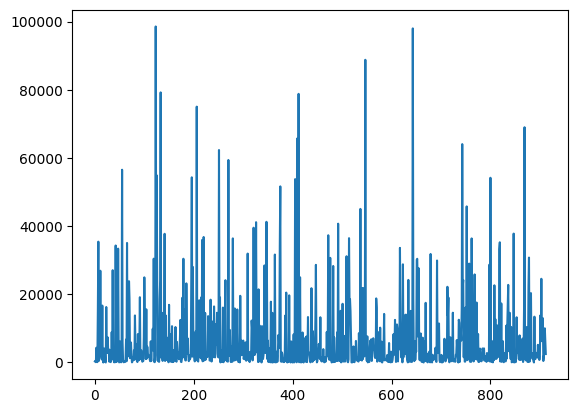

In [14]:
plt.plot(flood['gfd_area'])

ใช้ histogram ดู Bin ที่เหมาะสม

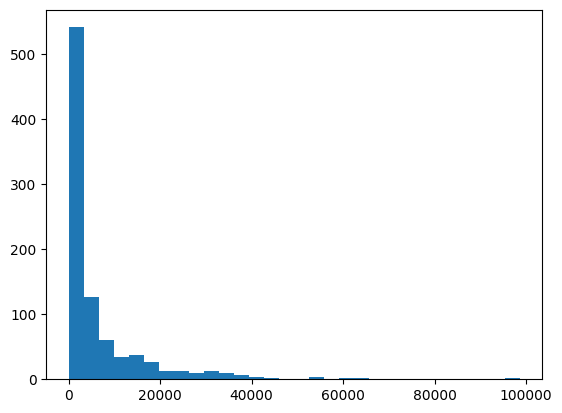

In [17]:
outputhist = plt.hist(flood['gfd_area'],30)

In [27]:
outputhist[1]

array([    0.        ,  3284.92066667,  6569.84133333,  9854.762     ,
       13139.68266667, 16424.60333333, 19709.524     , 22994.44466667,
       26279.36533333, 29564.286     , 32849.20666667, 36134.12733333,
       39419.048     , 42703.96866667, 45988.88933333, 49273.81      ,
       52558.73066667, 55843.65133333, 59128.572     , 62413.49266667,
       65698.41333333, 68983.334     , 72268.25466667, 75553.17533333,
       78838.096     , 82123.01666667, 85407.93733333, 88692.858     ,
       91977.77866667, 95262.69933333, 98547.62      ])

In [40]:
def put_value_into_bin(value,bin_edges=outputhist[1]):
  for i in range(len(bin_edges)-1):
    if value >= bin_edges[i] and value < bin_edges[i+1]:
      new_val = (bin_edges[i]+bin_edges[i+1]-bin_edges[i])/2
      return new_val
  return None

In [38]:
put_value_into_bin(3000,outputhist[1])

np.float64(1642.4603333333332)

In [50]:
flood['gfd_area_bin'] = flood['gfd_area'].apply(lambda x: put_value_into_bin(x,outputhist[1]))

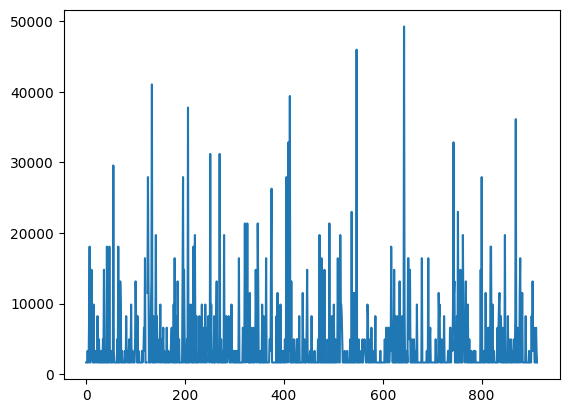

In [55]:
plt.plot(flood['gfd_area_bin'])

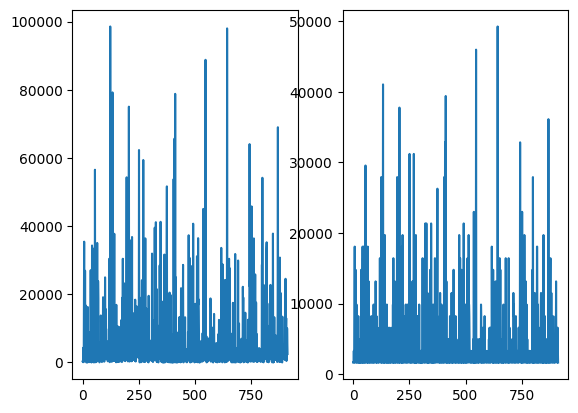

In [52]:
plt.subplot(1,2,1)
plt.plot(flood['gfd_area'])
plt.subplot(1,2,2)
plt.plot(flood['gfd_area_bin'])

In [53]:
flood['gfd_area'].sort_values()

,gfd_area
417,0.00
17,0.06
422,0.24
22,1.47
735,2.63
...,...
412,78785.53
133,79213.43
547,88773.57
643,97982.77


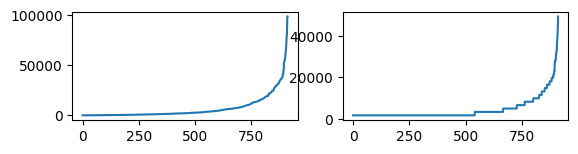

In [70]:
plt.subplot(3,2,1)
plt.plot(flood['gfd_area'].sort_values().reset_index(drop=True))
plt.subplot(3,2,2)
plt.plot(flood['gfd_area_bin'].sort_values().reset_index(drop=True))

## Binning

## Outlier Removal

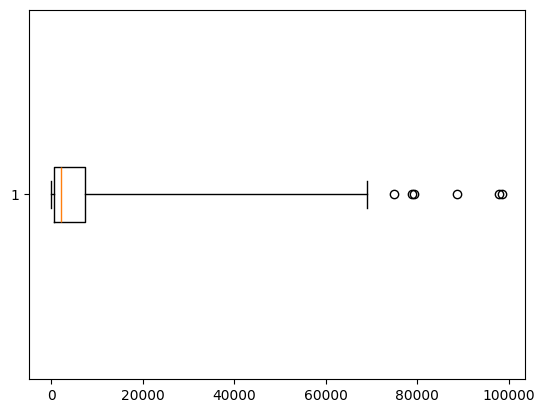

In [75]:
outputbox = plt.boxplot(flood['gfd_area'],vert=False,whis=10);

In [76]:
outputbox

{'whiskers': [<matplotlib.lines.Line2D at 0x7e2791d254c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7e2791d25ac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e2791d251f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7e2791d260c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e2791d26390>],
 'means': []}

In [79]:
outputbox['whiskers'][1].get_xdata()

array([ 7354.55, 68991.93])

In [84]:
outputbox['fliers'][0].get_xdata()

array([98547.62, 79213.43, 75030.8 , 78785.53, 88773.57, 97982.77])

remove outliers

In [87]:
flood_nooutlier = flood[flood['gfd_area']<outputbox['whiskers'][1].get_xdata()[1]]